In [32]:
import Plots, DataFrames, CSV
import Statistics

data = CSV.read(
    "data/hw_data.csv",
    DataFrames.DataFrame,
    header=false
)


h, w= data[:, 1], data[:, 2]

@show size(data), size(h), size(w)

(size(data), size(h), size(w)) = ((19, 2), (19,), (19,))


((19, 2), (19,), (19,))

In [48]:
# define the ReLU family of functions

function ReLU(x, z)
    [max(0, i-z) for i in x]
end

function F(a, θ)
    x -> θ[1] .+ sum([
            θ[i+1].*ReLU(x, a[i]) 
            for i in range(1, size(a)[1])
            ])
end

F (generic function with 1 method)

## 2 b)

In [55]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
θ = [1, 1, 1, 1, 1, 1, 1, 1, 1]

f1 = F(a, θ)
@show f1(2)

a = [8, 7, 6, 5, 4, 3, 2, 1]
θ = [2, 3, -1, 6, 3, 8, 11, 0, 1]

f2 = F(a, θ)
@show f2(20), f2([20,20])

f1(2) = 2
(f2(20), f2([20, 20])) = (488, [488, 488])


(488, [488, 488])

## 2 e)

In [123]:
N = 2

2

In [139]:
import Statistics

a = zeros(N-1)

# mean squared error
error(Y, y_pred) = Statistics.mean((Y - y_pred) .^ 2)
error_der(Y, y_pred, X) =  -2 * Statistics.mean(X .* (Y - y_pred), dims=1)

# gradient descent
function train(X, Y, epochs=100, learning_rate=0.1)
    θ = rand(N)
    @show θ
    for epoch in 1 : epochs
        # compute the forward pass
        forward = F(a, θ)
        y_pred = forward(X)
        # compute the error
        loss = error(Y, y_pred)
        @show epoch, loss 
        θ_derivate = error_der(Y, y_pred, X)
        # update weights
        θ = θ .- learning_rate * θ_derivate'
    end
    return θ 
end

train (generic function with 3 methods)

In [126]:
X = [h[i] for i in range(1, N)]
Y = [w[i] for i in range(1, N)]

θ = train(X, Y, 10, 1e-5)

θ = [0.4915244419224791, 0.699647921238079]
(iter, loss) = (1, 2084.8465767698945)
(iter, loss) = (2, 633.6327255344333)
(iter, loss) = (3, 194.70580567066514)
(iter, loss) = (4, 61.950504913400096)
(iter, loss) = (5, 21.798296654569143)
(iter, loss) = (6, 9.654256331703994)
(iter, loss) = (7, 5.981348266320542)
(iter, loss) = (8, 4.8705265710944445)
(iter, loss) = (9, 4.534591145670895)
(iter, loss) = (10, 4.433007053183795)


2×1 Matrix{Float64}:
 0.18923564515016997
 0.39735912446576976

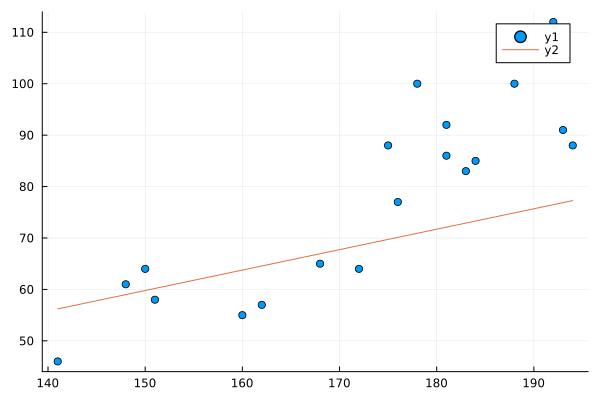

In [131]:
# i)
f = F(a, θ)

p = Plots.scatter(h, w)
p = Plots.plot(p, f)

θ = [0.1266709196972754, 0.7919234196896838]
(epoch, loss) = (1, 3595.5302942642707)
(epoch, loss) = (2, 689.8182515915566)
(epoch, loss) = (3, 232.77238797431806)
(epoch, loss) = (4, 160.86476948547465)
(epoch, loss) = (5, 149.54436693301648)
(epoch, loss) = (6, 147.75939013077573)
(epoch, loss) = (7, 147.47682640470893)
(epoch, loss) = (8, 147.43165627011336)
(epoch, loss) = (9, 147.42426210446985)
(epoch, loss) = (10, 147.42298407997023)
(epoch, loss) = (11, 147.4227374167865)
(epoch, loss) = (12, 147.42268051256633)
(epoch, loss) = (13, 147.42266438064738)
(epoch, loss) = (14, 147.42265899516886)
(epoch, loss) = (15, 147.422657018601)
(epoch, loss) = (16, 147.42265625978442)
(epoch, loss) = (17, 147.42265596279782)
(epoch, loss) = (18, 147.4226558456413)
(epoch, loss) = (19, 147.4226557992781)
(epoch, loss) = (20, 147.4226557809072)
θ = [-0.2103942607454269; 0.45485823924698143;;]


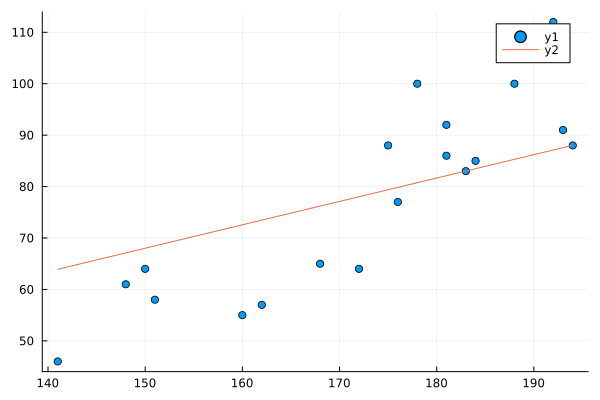

In [141]:
# ii)
θ = train(h, w, 20, 1e-5)
@show θ
f = F(a, θ)

p = Plots.scatter(h, w)
p = Plots.plot(p, f)